In [1]:
import os
import pickle
from equipment.Tektronix.oscilloscope import load_csv
from notebook.library.tau_qp import single_fit, dual_fit, plot_single_fit, plot_dual_fit

In [2]:
data_directory = '/Users/daniel/Johnson+Miller/KIDs/SKIP/STAR Cryo Version 0/2014-07-21_tau_qp_load'
with open(os.path.join(data_directory, 'pulse.pkl')) as f:
    pulse = pickle.load(f)
with open(os.path.join(data_directory, 'spike.pkl')) as f:
    spike = pickle.load(f)

We drove the LED at about 100 Hz with illumination times of 2 ms and 50 $\mu$s. We called the longer illumination time the 'pulse' and the shorter illumination time the 'spike'.

At each temperature, we adjusted the LED current so that the signal response was about 2 mV. This involved increasing the current as the responsivity decreased at higher stage or load temperatures.

All of the data shown here is taken using a resonance at about 870 MHz found on the 20-element array. The array is illuminated 

The 'pulse' duration is

In [3]:
pulse['duration']

0.002

In [4]:
pulse_data = []
pulse_header = []
pulse_single = []
pulse_dual = []
for filename in pulse['file']:
    data, header = load_csv(os.path.join(data_directory, filename))
    pulse_data.append(data)
    pulse_header.append(header)

In [5]:
pulse_delay = 10e-6
for data in pulse_data:
    pulse_single.append(single_fit(data.TIME, data.CH2, pulse['duration'] + pulse_delay))
    pulse_dual.append(dual_fit(data.TIME, data.CH2, pulse['duration'] + pulse_delay))

The 'spike' duration is

In [6]:
spike['duration']

5e-05

In [7]:
spike_data = []
spike_header = []
spike_single = []
spike_dual = []
for filename in spike['file']:
    data, header = load_csv(os.path.join(data_directory, filename))
    spike_data.append(data)
    spike_header.append(header)

In [8]:
spike_delay = 10e-6
for data in spike_data:
    spike_single.append(single_fit(data.TIME, data.CH2, spike['duration'] + spike_delay))
    spike_dual.append(dual_fit(data.TIME, data.CH2, spike['duration'] + spike_delay))

Fit a single time constant:
\begin{equation*}
V(t) = B + A \exp (-(t - t_0) / \tau),
\end{equation*}
where $B$ is the baseline value (determined by averaging points before the pulse), $t_0$ is the pulse duration plus a small delay, $A$ is the amplitude at $t_0$ (determined by averaging points around $t_0$), and $\tau$ is the time constant. The only free parameter in the fit is $\tau$.

Fit two time constants:
\begin{equation*}
V(t) = B + A_f \exp (-(t - t_0) / \tau_f) + (E - A_f) \exp (-(t - t_0) / \tau_s),
\end{equation*}
where $B$ and $t_0$ are as above, $E$ is the total excursion from baseline to the value at $t_0$ (determined by averaging points around $t_0$), $A_f$ is the amplitude of the fast time constant $\tau_f$, and $A_s$ is the amplitude of the slow time constant $\tau_s$ with $\tau_f < \tau_s$.

The three free parameters in the fit are $\tau_f$, $\tau_s$, and $A_f$, while $A_s = E - A_f$ is not independent.

Plot the lowest temperature point:

In [9]:
n = 0

In [10]:
pulse['T_load'][n]

3.966

In [11]:
pulse['T_stage'][n]

0.198

First compare the single and dual time constant fits for 2 ms illumination time.

Figure 1: plot the full trace. This fit looks pretty good, but the fit time constant changes by about a factor of two as the start point of the fit moves along the trace. This led us to decide that the behavior was more complicated than a single time constant.

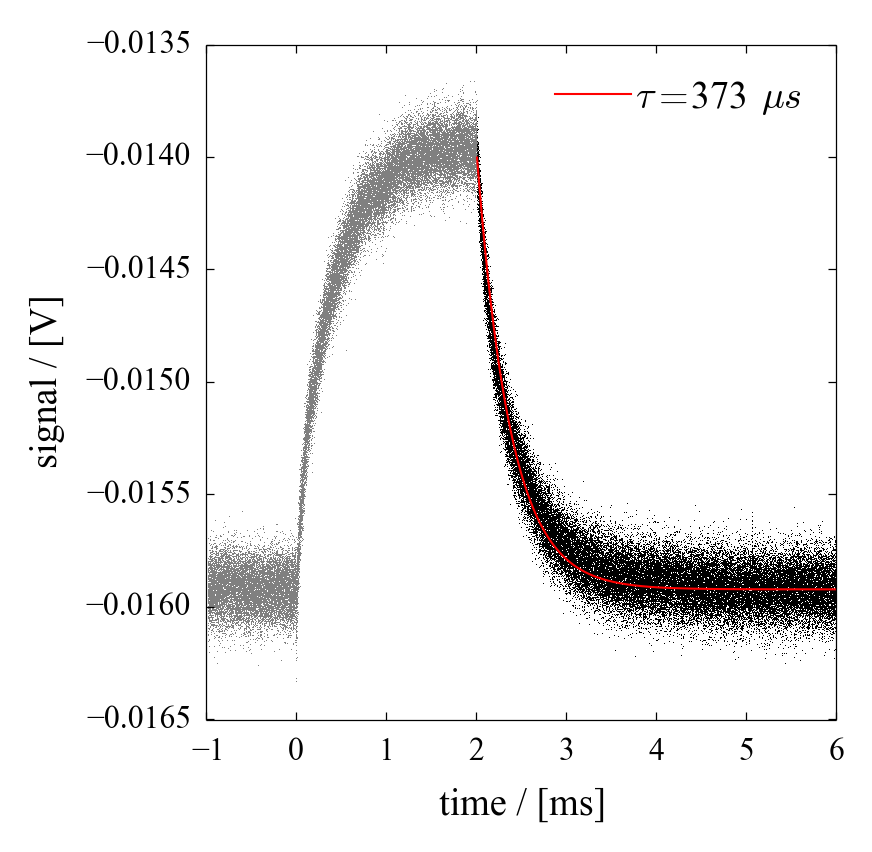

In [12]:
fig, ax = plot_single_fit(pulse_single[n].params, pulse_data[n].TIME, pulse_data[n].CH2)
ax.set_xlim(-1, 6);

Figure 2: plot detail of above. Here it is more clear that the fit is deviating from the measured points.

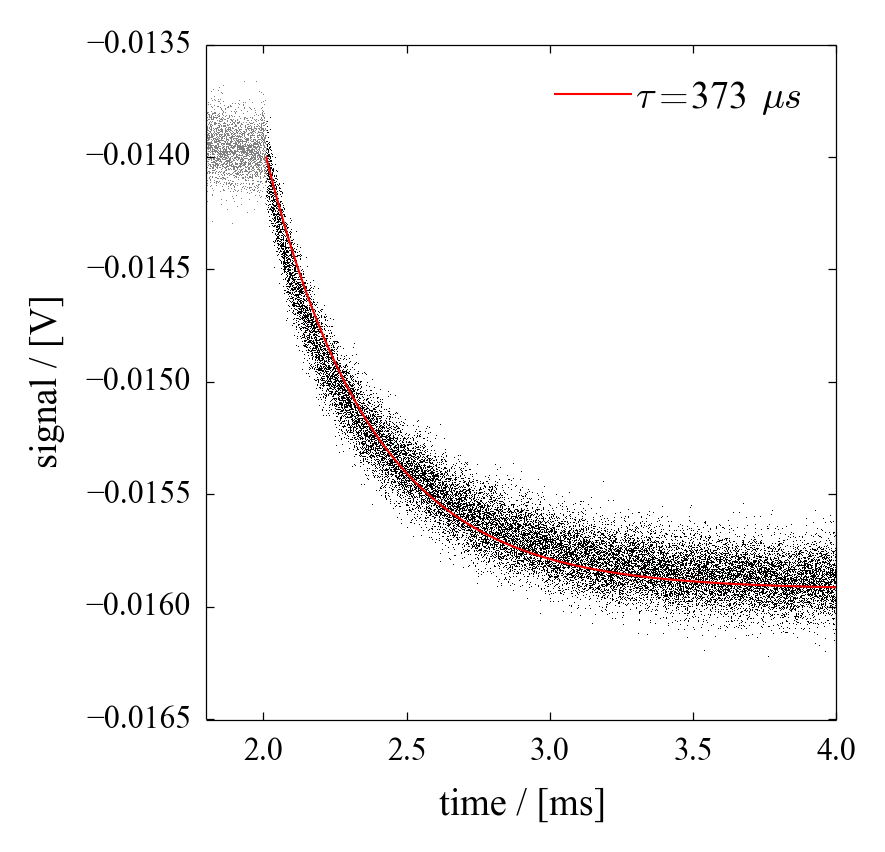

In [13]:
fig, ax = plot_single_fit(pulse_single[n].params, pulse_data[n].TIME, pulse_data[n].CH2)
ax.set_xlim(1.8, 4);

Figure 3: plot the same data as Figures 1 and 2 with a fit to two time constants.

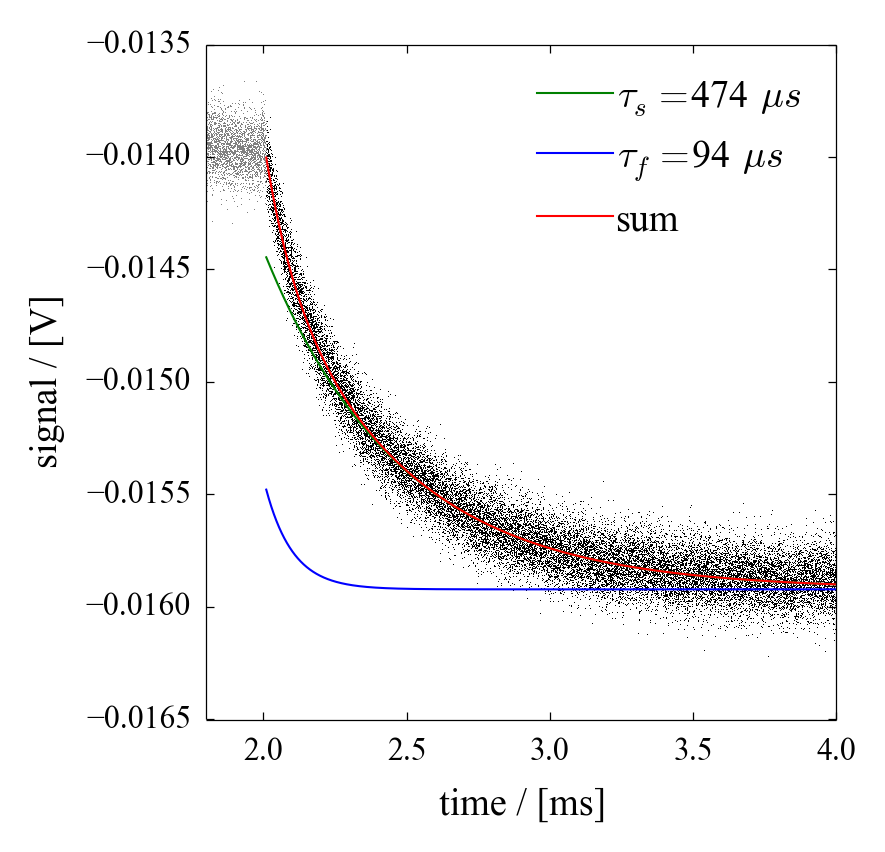

In [14]:
fig, ax = plot_dual_fit(pulse_dual[n].params, pulse_data[n].TIME, pulse_data[n].CH2)
ax.set_xlim(1.8, 4);

Now compare the single and dual time constant fits for a 50 $\mu$s illumination time.

Figure 4: plot the full trace for the single time constant fit to the spike data.

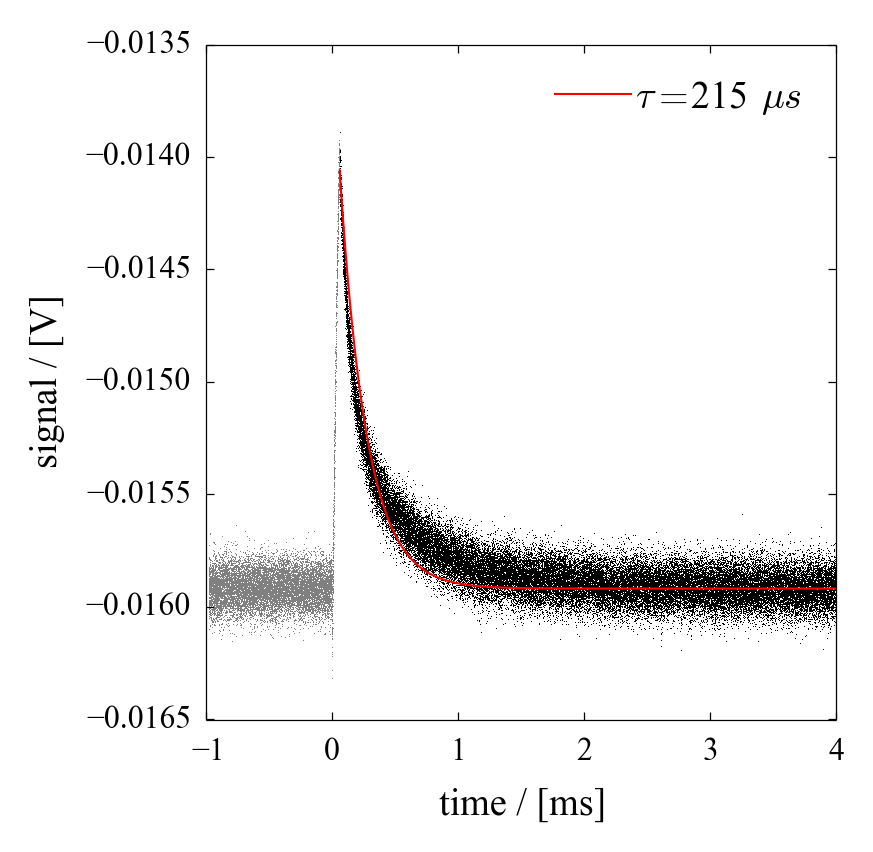

In [15]:
fig, ax = plot_single_fit(spike_single[n].params, spike_data[n].TIME, spike_data[n].CH2)
ax.set_xlim(-1, 4);

Figure 5: plot detail of the single time constant fit to the spike data.

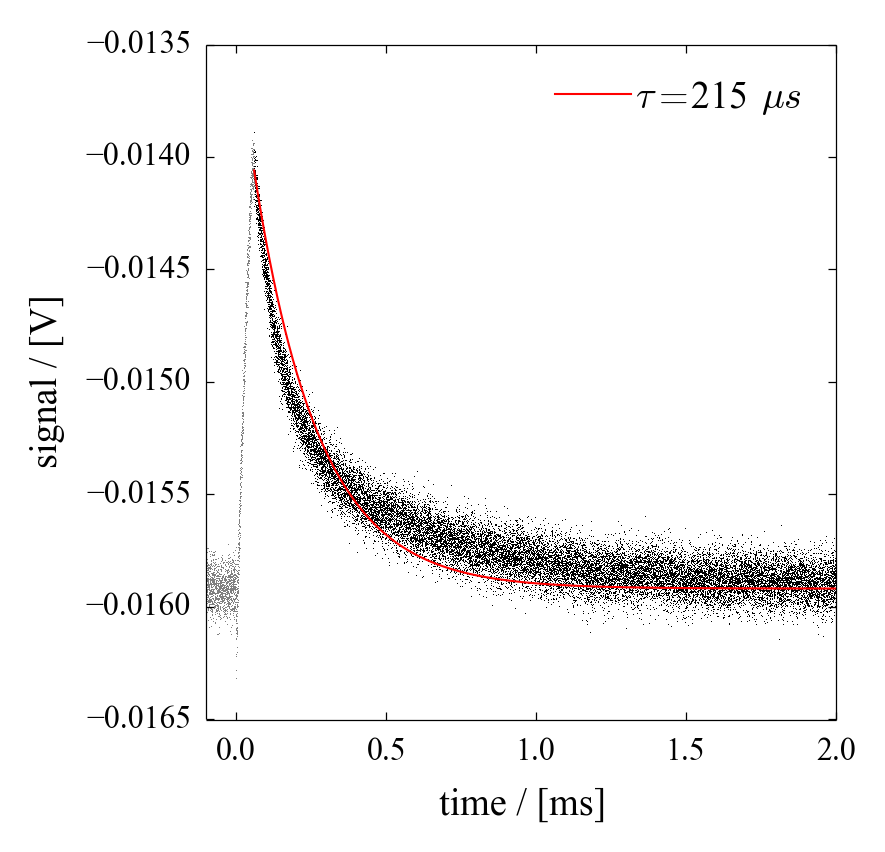

In [16]:
fig, ax = plot_single_fit(spike_single[n].params, spike_data[n].TIME, spike_data[n].CH2)
ax.set_xlim(-0.1, 2);

Figure 6: plot detail of the dual time constant fit to the spike data.

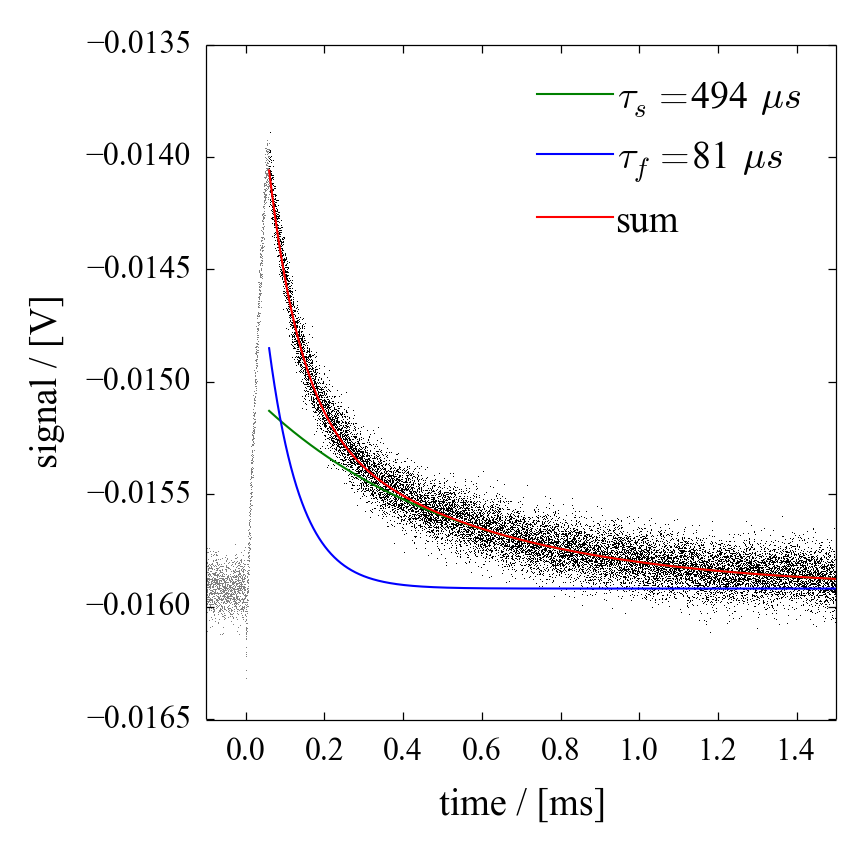

In [17]:
fig, ax = plot_dual_fit(spike_dual[n].params, spike_data[n].TIME, spike_data[n].CH2)
ax.set_xlim(-0.1, 1.5);